In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-prediction/Obesity prediction.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# # Data Details:

# Gender: Gender
# Age: Age
# Height : in metres
# Weight : in kgs
# family_history : Has a family member suffered or suffers from overweight?
# FAVC : Do you eat high caloric food frequently?
# FCVC : Do you usually eat vegetables in your meals?
# NCP : How many main meals do you have daily?
# CAEC : Do you eat any food between meals?
# SMOKE : Do you smoke?
# CH2O : How much water do you drink daily?
# SCC : Do you monitor the calories you eat daily?
# FAF: How often do you have physical activity?
# TUE : How much time do you use technological devices such as cell phone, videogames, television, computer and others?
# CALC : How often do you drink alcohol?
# MTRANS : Which transportation do you usually use?
# Obesity_level (Target Column) : Obesity level



In [4]:
obs = pd.read_csv('/kaggle/input/obesity-prediction/Obesity prediction.csv')
obs_string = pd.read_csv('/kaggle/input/obesity-prediction/Obesity prediction.csv')

print(obs.shape)
obs.head(5)

(2111, 17)


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
obs.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [6]:
# Round off to a whole number the Age column

obs['Age'] = obs['Age'].round()
obs_string['Age'] = obs_string['Age'].round()

In [7]:
# ADD BMI COLUMN
bmi = obs['Weight'] / (obs['Height'] ** 2)

obs['BMI'] = bmi
obs_string['BMI'] = bmi

obs.tail()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI
2106,Female,21.0,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,22.0,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,23.0,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.0,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535
2110,Female,24.0,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III,44.144338


# CORRELATION BETWEEN COLUMNS

<ipython-input-8-d8edb8e14e40>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  obs_bin[binary_cols] = obs_bin[binary_cols].applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))


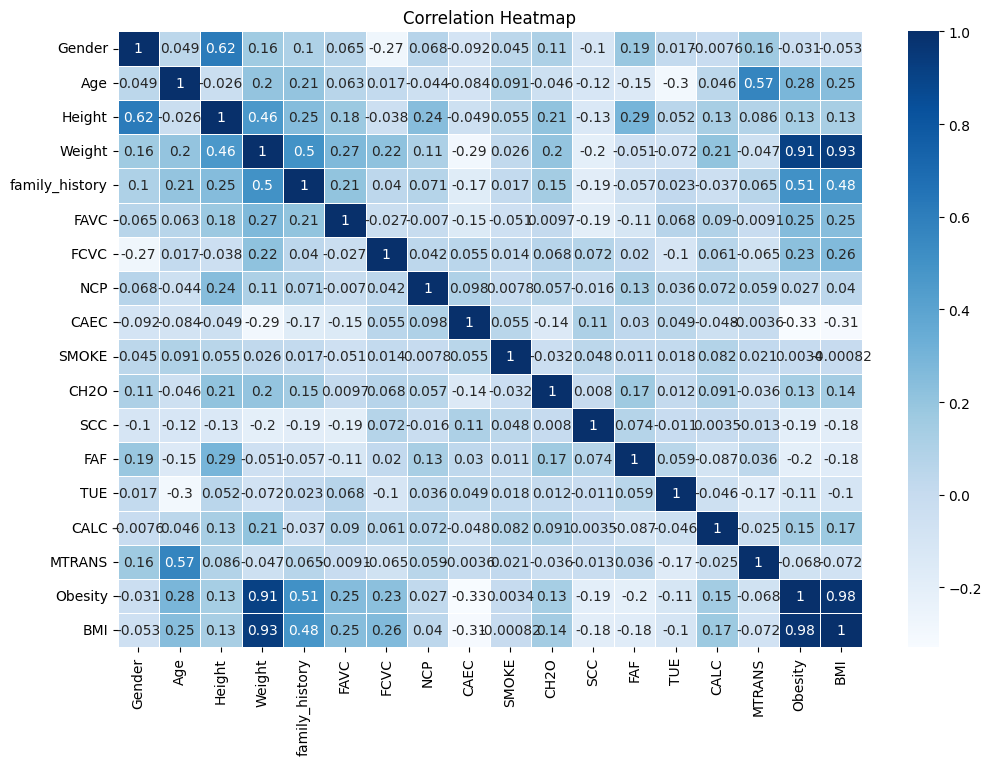

In [8]:
obs_bin = obs

binary_cols = ['family_history', 'FAVC', 'SMOKE', 'SCC']
obs_bin[binary_cols] = obs_bin[binary_cols].applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))


obs_bin['CAEC'] = obs_bin['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
obs_bin['CALC'] = obs_bin['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})


obs_bin['Obesity'] = obs_bin['Obesity'].map({'Insufficient_Weight': 0,'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})


obs_bin['Gender'] = obs_bin['Gender'].map({'Male': 1, 'Female': 0})


obs_bin['MTRANS'] = obs_bin['MTRANS'].map({'Public_Transportation': 0, 'Walking': 1, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})


corr = obs_bin.corr()

vmin = corr.min().min()  
vmax = corr.max().max()  


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', vmin=vmin, vmax=vmax, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Relationship Between Age To Physical Activity and Caloric Intake

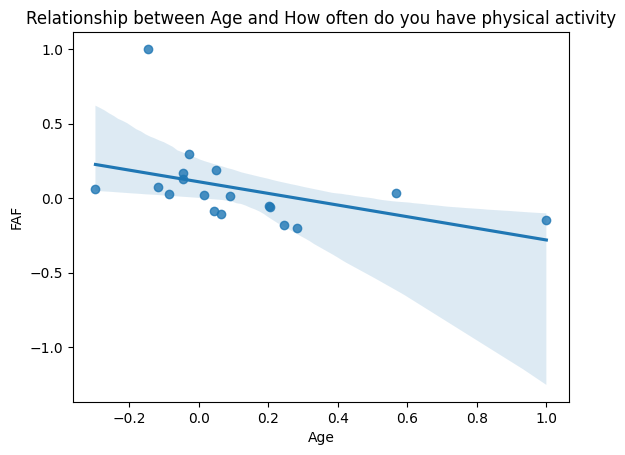

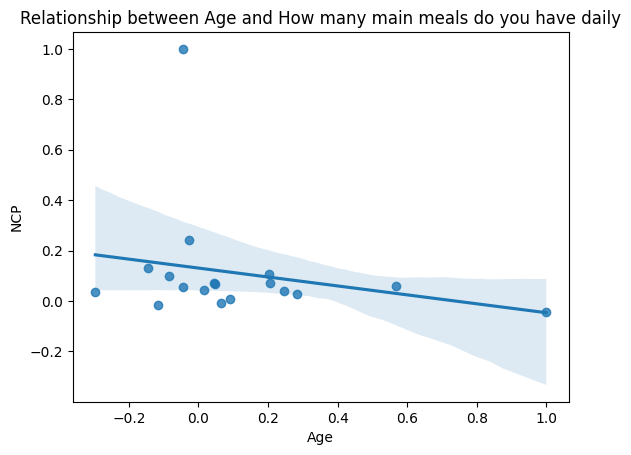

In [9]:
# FAF: How often do you have physical activity?
# NCP : How many main meals do you have daily?

obs_corr = corr[['Age','FAF', 'NCP']]

# Scatter plot with regression line for Age vs FAF
sns.regplot(x='Age', y='FAF', data=obs_corr)
plt.title('Relationship between Age and How often do you have physical activity')
plt.show()

# Scatter plot with regression line for Age vs NCP
sns.regplot(x='Age', y='NCP', data=obs_corr)
plt.title('Relationship between Age and How many main meals do you have daily')
plt.show()

# Relationship Between Lifestyle Factors and Obesity

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


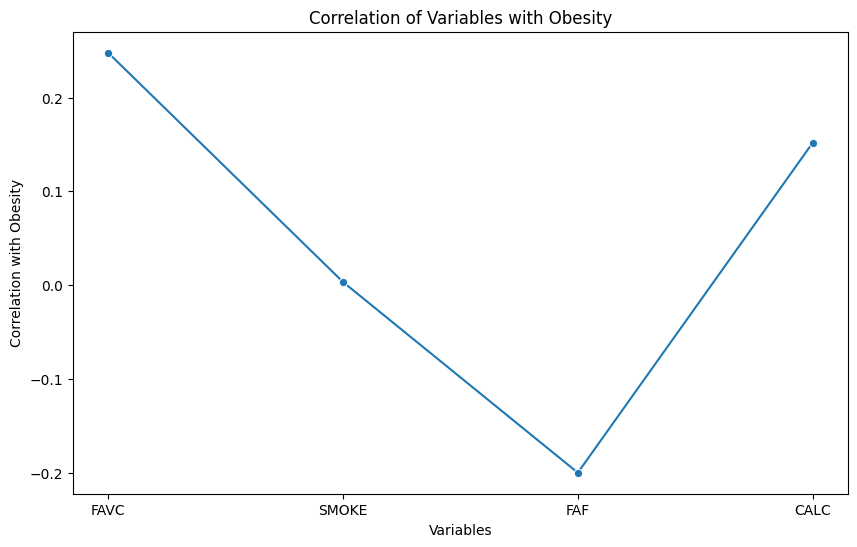

In [10]:
# FAVC : Do you eat high caloric food frequently?
# SMOKE : Do you smoke?
# FAF: How often do you have physical activity?
# CALC : How often do you drink alcohol?

obs_corr2 = corr.loc[['Obesity'], ['FAVC', 'SMOKE', 'FAF', 'CALC']]

obs_corr2


plt.figure(figsize=(10, 6))
sns.lineplot(x=obs_corr2.columns, y=obs_corr2.loc['Obesity'], marker='o')


plt.title('Correlation of Variables with Obesity')
plt.xlabel('Variables')
plt.ylabel('Correlation with Obesity')


plt.show()

# Influence of Family History and Gender on Obesity

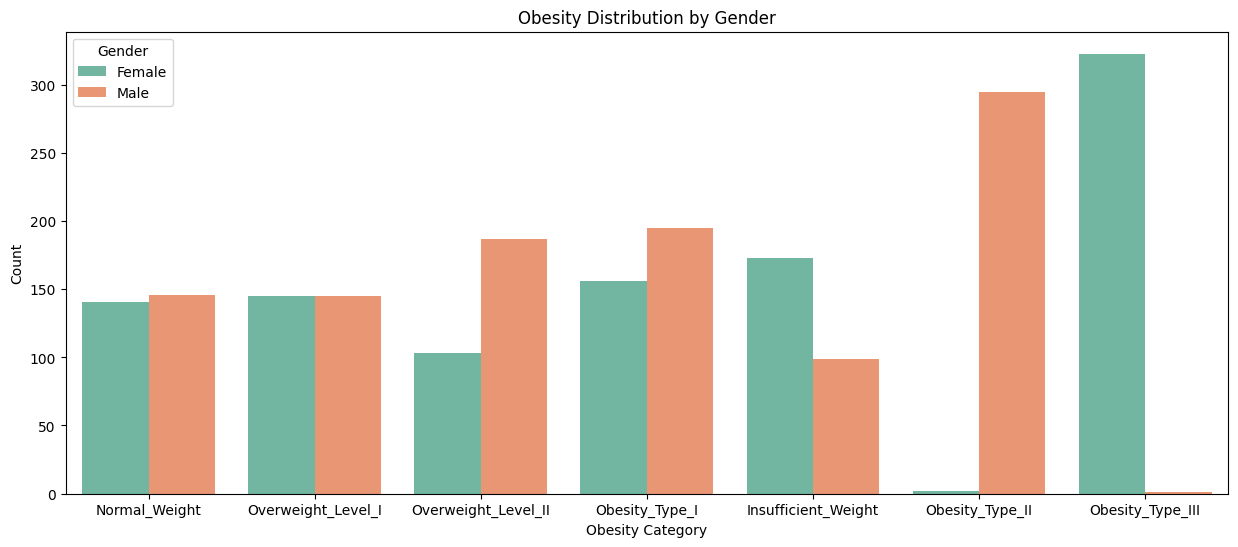

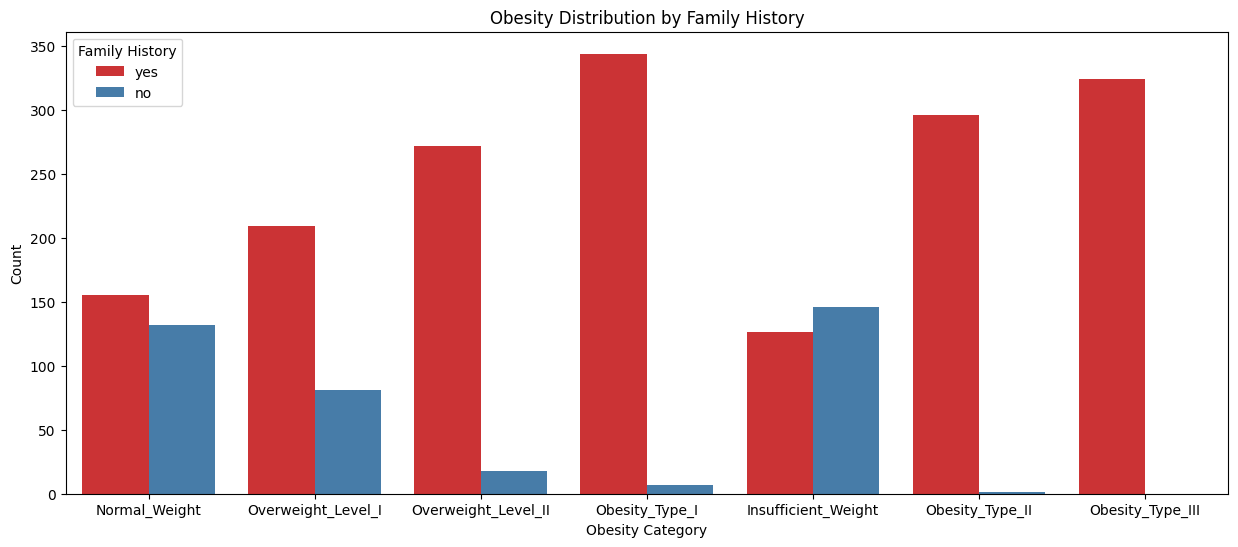

Cross-tabulation of Gender and Obesity:
Obesity  Insufficient_Weight  Normal_Weight  Obesity_Type_I  Obesity_Type_II  \
Gender                                                                         
Female                   173            141             156                2   
Male                      99            146             195              295   

Obesity  Obesity_Type_III  Overweight_Level_I  Overweight_Level_II  
Gender                                                              
Female                323                 145                  103  
Male                    1                 145                  187  

Cross-tabulation of Family History and Obesity:
Obesity         Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
family_history                                                       
no                              146            132               7   
yes                             126            155             344   

Obesity         Obesity_Type_II  

In [11]:
# Gender: Gender
# family_history : Has a family member suffered or suffers from overweight?
# Obesity_level (Target Column) : Obesity level

obs_fam = obs_string[['Gender', 'family_history', 'Obesity']]


plt.figure(figsize=(15, 6))
sns.countplot(x='Obesity', hue='Gender', data=obs_fam, palette='Set2')
plt.title('Obesity Distribution by Gender')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


plt.figure(figsize=(15, 6))
sns.countplot(x='Obesity', hue='family_history', data=obs_fam, palette='Set1')
plt.title('Obesity Distribution by Family History')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.show()


gender_obesity_crosstab = pd.crosstab(obs_fam['Gender'], obs_fam['Obesity'])
print("Cross-tabulation of Gender and Obesity:")
print(gender_obesity_crosstab)


family_history_obesity_crosstab = pd.crosstab(obs_fam['family_history'], obs_fam['Obesity'])
print("\nCross-tabulation of Family History and Obesity:")
print(family_history_obesity_crosstab)


gender_obesity_chi2, p_value_gender, _, _ = chi2_contingency(gender_obesity_crosstab)
print(f"\nChi-square test p-value for Gender and Obesity: {p_value_gender}")


family_history_obesity_chi2, p_value_family_history, _, _ = chi2_contingency(family_history_obesity_crosstab)
print(f"\nChi-square test p-value for Family History and Obesity: {p_value_family_history}")


Both variables, Gender and Family History, are statistically significant in determining or being associated with Obesity in your dataset. The extremely small p-values indicate a very strong relationship between each of these variables and obesity levels.

# Impact of Age and Effect of Transportation Mode on Obesity

<ipython-input-12-bd023932ae85>:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Obesity', y='Age', data=obs_age, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_gro

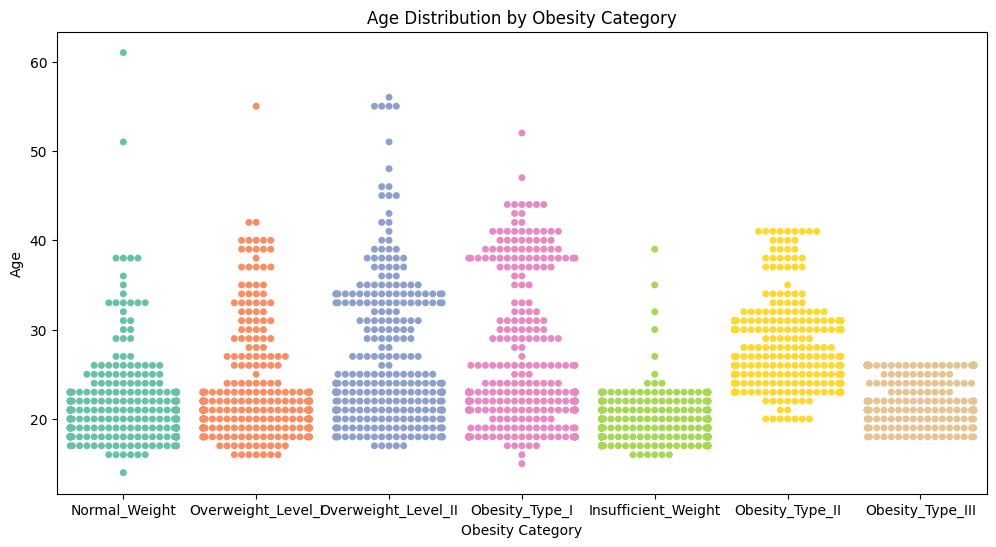

In [12]:
# Age: Age
# MTRANS : Which transportation do you usually use?
# Obesity_level (Target Column) : Obesity level

obs_age = obs_string[['Age', 'MTRANS', 'Obesity']]

plt.figure(figsize=(12, 6))
sns.swarmplot(x='Obesity', y='Age', data=obs_age, palette='Set2')
plt.title('Age Distribution by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Age')
plt.show()


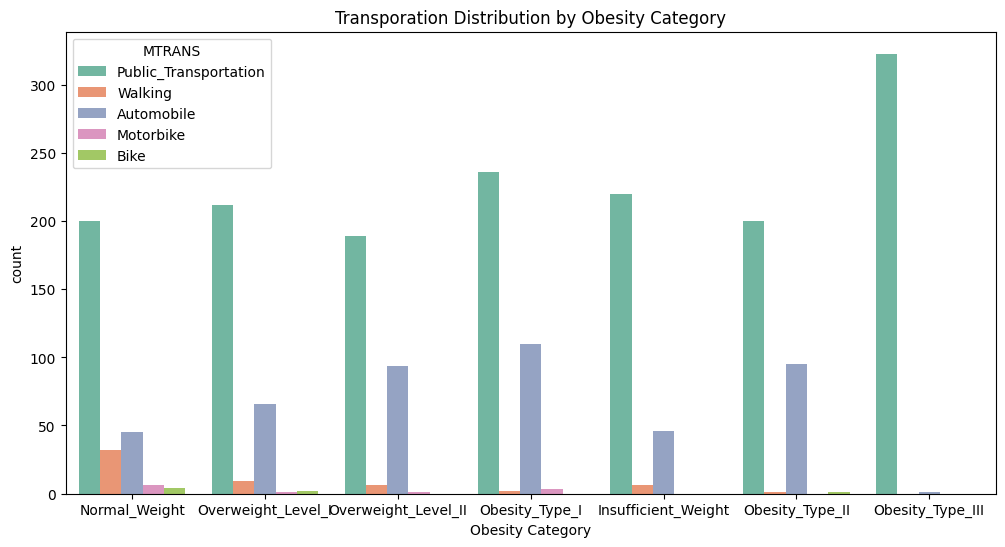

In [13]:
obs_age = obs_string[['Age', 'MTRANS', 'Obesity']]

plt.figure(figsize=(12, 6))
sns.countplot(x='Obesity', hue='MTRANS', data=obs_age,palette='Set2')
plt.title('Transporation Distribution by Obesity Category')
plt.xlabel('Obesity Category')
plt.show()

# Investigate the Role of Water Consumption or Alchohol on Obesity

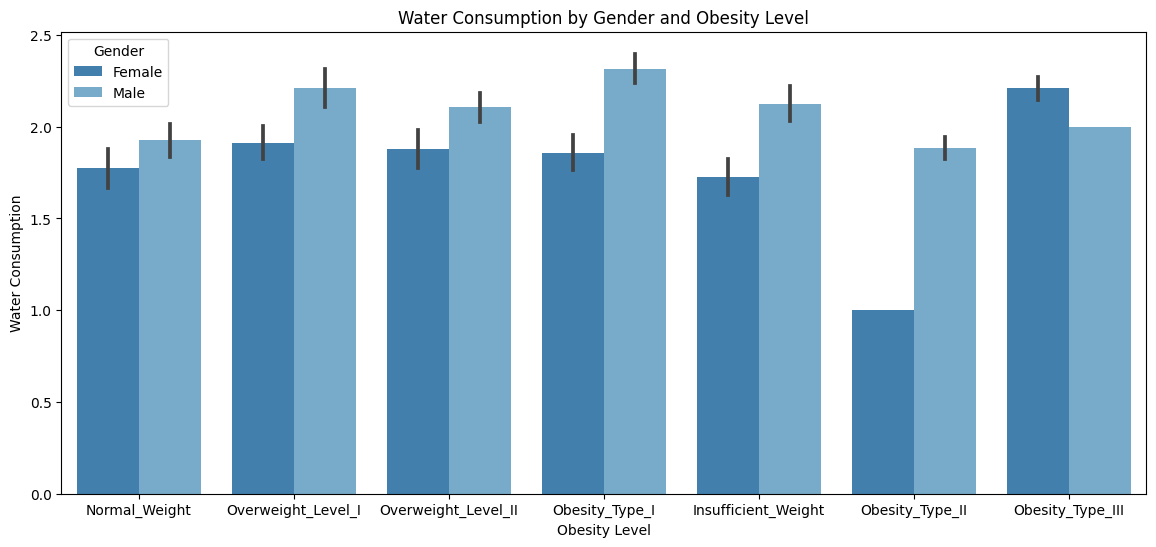

In [14]:
# CH2O : How much water do you drink daily?
# CALC : How often do you drink alcohol?
# Obesity_level (Target Column) : Obesity level

obs_water = obs_string[['CH2O', 'Obesity', 'Gender']]

plt.figure(figsize=(14, 6))
sns.barplot(data=obs_water, x='Obesity', y='CH2O', hue='Gender', palette='tab20c')
plt.title('Water Consumption by Gender and Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Water Consumption')
plt.legend(title='Gender')
plt.show()

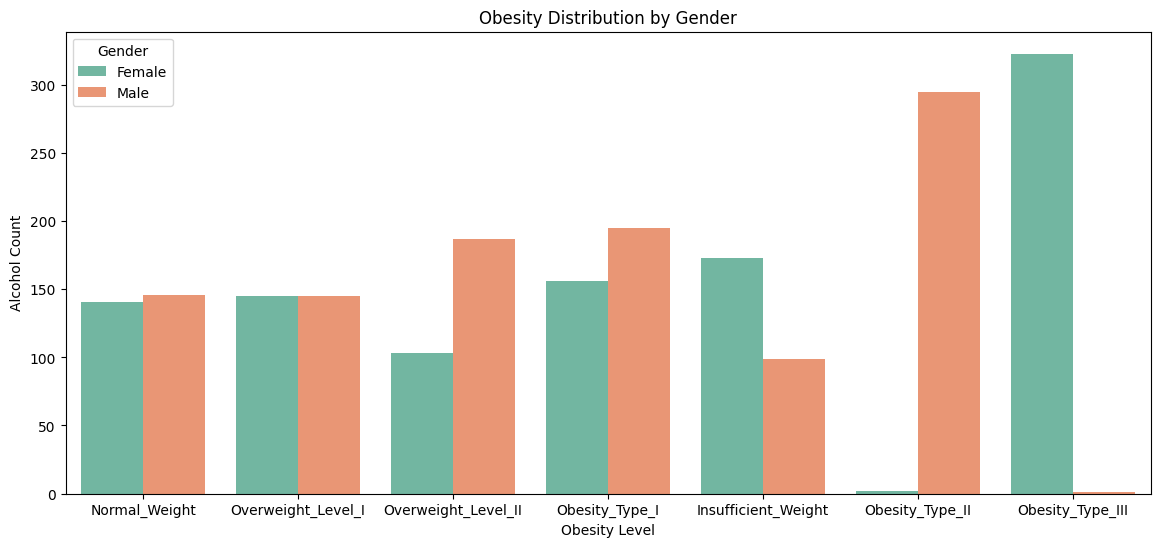

In [15]:
obs_alc = obs_string[['CALC', 'Obesity', 'Gender']]

# Example: Countplot with multiple columns
plt.figure(figsize=(14, 6))
sns.countplot(data=obs_alc, x='Obesity', hue='Gender', palette='Set2')
plt.title('Obesity Distribution by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Alcohol Count')
plt.legend(title='Gender')
plt.show()